HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

[175, 174, 165, 171, 179]


<Figure size 432x288 with 0 Axes>

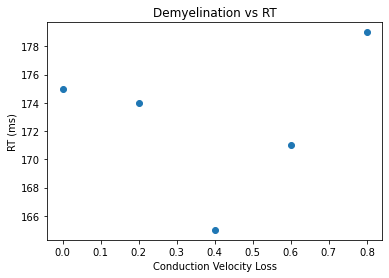

In [6]:
#  have to rethink inputs and delays altogether
import nengo
import nengo_spa as spa
import matplotlib.pyplot as plt
# with and without seed
import numpy as np
import random as rnd
import pickle
import time
timestr = time.strftime("%Y%m%d-%H%M%S")
d = 128  # the dimensionality of the vectors

# note dimension 
base_line = 0.002 #40 m/s
quick_delay = 0.0025 #32 m/s - 20% loss
slow_delay = 0.00333 #24 m/s - 40% loss
very_slow_delay = 0.005 #16 m/s - 60% loss
extremely_slow_delay = 0.01 #8 m/s - 80% loss

#subtract_baseline
base_line = 0.000
quick_delay = .0005
slow_delay = 0.00133
very_slow_delay = .003
time_interval = 1.0
extremely_slow_delay = .008 
#
wait =  0.0
feedback_synapse = 0.1
feedback = 0.99
percent_base_line = 1
percent_quick_delay = 1
percent_slow = 1
percent_very_slow = 1
percent_extremely_slow =1
noise_std = 1e-4

with spa.Network(seed = 1) as model:
        #noise = nengo.Node(nengo.processes.WhiteNoise(nengo.dists.Gaussian (0,noise_std)), size_out = d)
        #new_noise = nengo.processes.WhiteNoise(nengo.dists.Gaussian (0,noise_std))
        #new_numb = rnd.random()
        #print(new_numb)
        timer = time_interval + wait
        vocab = spa.Vocabulary(d)
        vocab.populate('BLUE; RED; GREEN')
        GREEN = vocab.parse('GREEN')
        RED = vocab.parse('RED')
        BLUE = vocab.parse('BLUE')

    #make it feedback[0] as loop is out
        Color = spa.State(vocab, feedback = feedback, represent_cc_identity = False)
        Color_slow = spa.State(vocab, feedback = feedback, represent_cc_identity = False)
        Color_quick_delay = spa.State(vocab, feedback = feedback, represent_cc_identity = False)
        Color_extremely_slow = spa.State(vocab, feedback = feedback, represent_cc_identity = False)
        Color_very_slow = spa.State(vocab, feedback = feedback, represent_cc_identity = False)
        #Color_twenty_percent =  spa.State(vocab, feedback = feedback, represent_cc_identity = False)
 
        

        
        def input_very_slow(t):
                if t <  very_slow_delay:
                    return '0'
                if t < time_interval + very_slow_delay:
                    return BLUE
                
                elif t < timer + very_slow_delay:
                    return '0'
                elif t < timer + time_interval + very_slow_delay:
                    return RED
                elif t < 2 * timer + very_slow_delay:
                    return '0'
                elif t < 2 * timer + time_interval + very_slow_delay:
                    return GREEN
                elif t < 3 * timer + very_slow_delay:
                    return '0'
                else:
                    return '0'
        
        def input_slow(t):
                if t < time_interval + slow_delay:
                    return BLUE
                elif t < timer + slow_delay:
                    return '0'
                elif t < timer + time_interval + slow_delay:
                    return RED
                elif t < 2 * timer + slow_delay:
                    return '0'
                elif t < 2 * timer + time_interval + slow_delay:
                    return GREEN
                elif t < 3 * timer + slow_delay:
                    return '0'
                else:
                    return '0'
        
        def input_quick_delay(t):
                if t < time_interval + quick_delay:
                    return BLUE
                elif t < timer + quick_delay:
                    return '0'
                elif t < timer + time_interval + quick_delay:
                    return RED
                elif t < 2 * timer + quick_delay:
                    return '0'
                elif t < 2 * timer + time_interval + quick_delay:
                    return GREEN
                elif t < 3 * timer + quick_delay:
                    return '0'
                else:
                    return '0'
        
        def input_extremely_slow(t):
                if t < time_interval + extremely_slow_delay:
                    return BLUE
                elif t < timer + extremely_slow_delay:
                    return '0'
                elif t < timer + time_interval + extremely_slow_delay:
                    return RED
                elif t < 2 * timer + extremely_slow_delay:
                    return '0'
                elif t < 2 * timer + time_interval + extremely_slow_delay:
                    return GREEN
                elif t < 3 * timer + extremely_slow_delay:
                    return '0'
                else:
                    return '0'
        
        
        def input(t):
                if t < time_interval:
                    return BLUE
                elif t < timer:
                    return '0'
                elif t < timer + time_interval:
                    return RED
                elif t < 2 * timer:
                    return '0'
                elif t < 2 * timer + time_interval:
                    return GREEN
                elif t < 3 * timer:
                    return '0'
                else:
                    return '0'
        input_transcode = spa.Transcode(input, output_vocab = vocab)
        percent_base_line * input_transcode >> Color
        input_extremely_slow_transcode = spa.Transcode(input_extremely_slow, output_vocab = vocab)
        input_slow_transcode = spa.Transcode(input_slow, output_vocab = vocab)
        percent_slow * input_slow_transcode >> Color_slow
        input_very_slow_transcode = spa.Transcode(input_very_slow, output_vocab = vocab)
        input_quick_delay_transcode = spa.Transcode(input_quick_delay, output_vocab = vocab)
        percent_quick_delay * input_quick_delay_transcode >> Color_quick_delay
        percent_extremely_slow * input_extremely_slow_transcode >> Color_extremely_slow
        input_very_slow_transcode = spa.Transcode(input_very_slow, output_vocab = vocab)
        percent_very_slow * input_very_slow_transcode >> Color_very_slow
        '''
        percent_base* input_transcode + percent_slow * input_slow_transcode + \
          percent_bit_slow * input_quick_delay_transcode + \
          percent_very_slow * input_very_slow_transcode + \
          percent_extremely_slow * input_extremely_slow_transcode >> Color_slow 
        
       
        0.05 * input_transcode >> Color_twenty_percent 
        '''
        probe_Color = nengo.Probe(Color.output, synapse = 0.01) 
        probe_Color_slow = nengo.Probe(Color_slow.output, synapse = 0.01)
        probe_Color_slow = nengo.Probe(Color_slow.output, synapse = 0.01)
        probe_Color_very_slow = nengo.Probe(Color_very_slow.output, synapse = 0.01)
        probe_Color_quick_delay = nengo.Probe(Color_quick_delay.output, synapse = 0.01)
        probe_Color_extremely_slow = nengo.Probe(Color_extremely_slow.output, synapse = 0.01)
        
        with nengo.Simulator(model) as sim:  # Create the simulator
               
               
            sim.run(timer*1.5)
        
        numbers  = spa.similarity(sim.data[probe_Color], vocab, normalize = True)
        numbers_slow  = spa.similarity(sim.data[probe_Color_slow], vocab, normalize = True)
        numbers_very_slow  = spa.similarity(sim.data[probe_Color_very_slow], vocab, normalize = True)
        numbers_quick_delay  = spa.similarity(sim.data[probe_Color_quick_delay], vocab, normalize = True)
        numbers_extremely_slow  = spa.similarity(sim.data[probe_Color_extremely_slow], vocab, normalize = True)
           
        
                 
        pickle.dump(numbers, open("data_Oct14", "wb"))
        graph_Oct14 = pickle.load(open("data_Oct14", "rb"))        
        
        pickle.dump(numbers_slow, open("data_Oct14_slow", "wb"))
        graph_Oct14_slow = pickle.load(open("data_Oct14_slow", "rb"))   
        
        pickle.dump(numbers_quick_delay, open("data_Oct14_quick_delay", "wb"))
        graph_Oct14_quick_delay = pickle.load(open("data_Oct14_quick_delay", "rb"))        
        
        pickle.dump(numbers_extremely_slow, open("data_Oct14_extremely_slow", "wb"))
        graph_Oct14_extremely_slow = pickle.load(open("data_Oct14_extremely_slow", "rb"))        
        
        pickle.dump(numbers_very_slow, open("data_Oct14_very_slow", "wb"))
        graph_Oct14_very_slow = pickle.load(open("data_Oct14_very_slow", "rb"))        
        
        
        plt.figure()
        pt_8_L = [0,0.8]
        pt_8_R = [8, 0.8]
        x_seg = [pt_8_L[0],pt_8_R[0]]
        y_seg = [pt_8_L[1],pt_8_R[1]]

        
        # Find value where simulation crosses threshold of 0.8 and record points
        value = 0.8
        absolute_val_array = np.abs(graph_Oct14[:,1] - value)
        smallest_difference_index = absolute_val_array.argmin()
        closest_element = smallest_difference_index - 1000 #stimulus presented at 1 sec, subtract 1 sec
        BasePoint = closest_element
        
        absolute_val_array = np.abs(graph_Oct14_quick_delay[:,1] - value)
        smallest_difference_index = absolute_val_array.argmin()
        closest_element = smallest_difference_index - 1000 #stimulus presented at 1 sec, subtract 1 sec
        QuickPoint = closest_element   
        
        absolute_val_array = np.abs(graph_Oct14_slow[:,1] - value)
        smallest_difference_index = absolute_val_array.argmin()
        closest_element = smallest_difference_index - 1000 #stimulus presented at 1 sec, subtract 1 sec
        SlowPoint = closest_element
        
        absolute_val_array = np.abs(graph_Oct14_very_slow[:,1] - value)
        smallest_difference_index = absolute_val_array.argmin()
        closest_element = smallest_difference_index - 1000 #stimulus presented at 1 sec, subtract 1 sec
        VerySlowPoint = closest_element
        
        absolute_val_array = np.abs(graph_Oct14_extremely_slow[:,1] - value)
        smallest_difference_index = absolute_val_array.argmin()
        closest_element = smallest_difference_index - 1000 #stimulus presented at 1 sec, subtract 1 sec
        ExSlowPoint = closest_element
        
        # Plot
        Points = [BasePoint, QuickPoint, SlowPoint, VerySlowPoint, ExSlowPoint]
        xvals = [0,0.2,0.4,.6,.8]
        plt.figure()
        plt.scatter(xvals,Points)
        print(Points)
        plt.xlabel("Conduction Velocity Loss")
        plt.ylabel("RT (ms)") 
        plt.title("Demyelination vs RT")  
        #plt.savefig('Demyelination.svg')    
        #plt.savefig('Demyelination.png')    